**MLP - Marco Patiño and Armando Rodríguez**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import preprocessing, metrics 
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from sklearn.inspection import permutation_importance
from numpy.random import choice

In [ ]:
random_state=10000

### Dataset

In [ ]:
df = pd.read_csv('botNoBot2018_preprocessed.csv',lineterminator='\n')
df.shape

(10991, 13)

In [ ]:
Y = df["category"]
X = df.drop(columns="category", axis=1);
X.describe()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, train_size=0.8, shuffle=True, stratify=Y,random_state=random_state);

In [ ]:
scaler = preprocessing.Normalizer('max').fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Model 

In [ ]:
sizes = [2, 4, 8, 12, 16, 32, 64, 128, [2,2], [4,4], [8,8], [10,10]]
solvers = ['adam', 'lbfgs', 'sgd']
activations = ['logistic', 'tanh', 'relu']


model_nnet = MLPClassifier(alpha=0, max_iter=1000000)

m1 = GridSearchCV(estimator=model_nnet, scoring='accuracy', cv = 5, param_grid={'hidden_layer_sizes': sizes, 'solver': solvers, 'activation': activations }, verbose=10) 
M1 = m1.fit(Xtrain, Ytrain)

In [ ]:
pd.DataFrame(m1.cv_results_)

In [ ]:
m1.best_params_ , m1.best_score_

In [ ]:
alphas = np.logspace(-5, 2, 15)

model_nnet = MLPClassifier(activation='tanh', hidden_layer_sizes=32, solver='lbfgs', max_iter=1000000)

m2 = GridSearchCV(estimator=model_nnet, scoring='accuracy', cv = 5, param_grid={'alpha': alphas}, verbose=10000) 
M2 = m2.fit(Xtrain, Ytrain)

In [ ]:
m2.best_params_ , m2.best_score_

In [ ]:
finalModel = MLPClassifier(activation='tanh', hidden_layer_sizes=32, solver='lbfgs', alpha=0.01, max_iter=1000000000, verbose=100).fit(Xtrain, Ytrain)

### Interpretability

In [ ]:
print(classification_report(finalModel.predict(Xtest), Ytest,target_names=['human', 'bot']))

              precision    recall  f1-score   support

       human       0.84      0.84      0.84      1075
         bot       0.85      0.85      0.85      1124

    accuracy                           0.85      2199
   macro avg       0.85      0.85      0.85      2199
weighted avg       0.85      0.85      0.85      2199



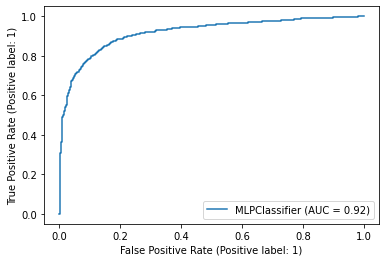

In [ ]:
RocCurveDisplay.from_estimator(finalModel, Xtest,Ytest, pos_label=1)

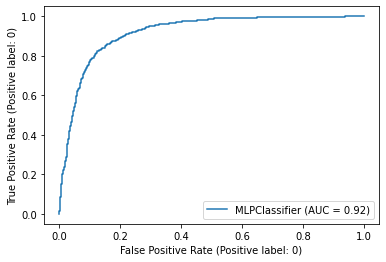

In [ ]:
RocCurveDisplay.from_estimator(finalModel, Xtest,Ytest, pos_label=0)

In [ ]:
c = choice(Xtest.shape[0], size=2000, replace=False)
pi = permutation_importance(finalModel,Xtest[c], Ytest.to_numpy()[c], n_jobs=-1, random_state=0)
var_imp = pd.DataFrame({'importance': pi.importances_mean}, index=X.columns)

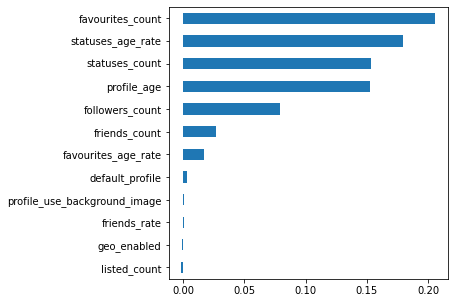

In [ ]:
var_imp.sort_values(by='importance')[:].plot.barh(figsize=(5,5),
                                               legend=False);

In [ ]:
pred = finalModel.predict(Xtest)
print("\nConfusion matrix on test set:\n", metrics.confusion_matrix(Ytest, pred))
print("\nAccuracy on test set: ", metrics.accuracy_score(Ytest, pred))


Confusion matrix on test set:
 [[906 168]
 [169 956]]

Accuracy on test set:  0.8467485220554798
